In [31]:
pwd

'/home/hadoop/solo_study/santander-customer-transaction-prediction'

# 데이터 읽기

In [32]:
import pandas as pd
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv("./sample_submission.csv")

In [150]:
# sample_submission.shape

(200000, 2)

# 데이터 shape 확인 + isnull().sum() 확인

In [3]:
train.head(1)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.691,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914


In [4]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [5]:
train.shape

(200000, 202)

In [6]:
test.head(1)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.43,2.4508,13.7112,2.4669,4.3654,10.72,15.4722,-8.7197


In [7]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [8]:
test.shape

(200000, 201)

In [9]:
sample_submission.head(1)

,ID_code,target
0,test_0,0


# train test 데이터 describe
두개의 값들이 비슷한걸 알 수 있다

In [10]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


# 한번 minmax scaler해자자
minmax는 별로 좋지가 않다...표준편차가 작을때 적합, 이상치에 민감
standscaler는 이상치 많을때 사용안함... (0,1)로 생성
normalizer 과대적합 확률 낮춘다.
robust scaler - 중위수와 사분위수 사용해서 이상치에 덜민감

### 이상치 개수를 확인해보자

In [20]:
import numpy as np

In [63]:
def outlier_check():
    scaler_list = train.select_dtypes(include=np.number).columns.tolist()
    scaler_list = scaler_list[1:]
    for where in scaler_list:
        q25, q75 = np.quantile(train[where],0.25) , np.quantile(train[where],0.75)
        iqr = q75 - q25
        cutline = iqr*1.5
        lower , upper = q25-cutline , q75+cutline
        temp = train[train[where]<lower]
        temp1 = train[train[where]>upper]
        count = temp.shape[0] + temp1.shape[0]
        # break
        print(count)
    return
        # print(len(temp))
        # return print(scaler_list)
# outlier_check()    

In [33]:
import numpy as np

In [34]:
scaler_list = train.select_dtypes(include=np.number).columns.tolist()

In [35]:
scaler_list = scaler_list[1:]

In [69]:
# scaler_list

In [70]:
train_describe = train.describe()

In [71]:
train_describe

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# 혹시 몰라서 원본 데이터 복사해서 min max 정리해보기

In [72]:
min_max_train = train.copy()

In [73]:
min_max_train.shape

(200000, 202)

In [36]:
from tqdm import tqdm

In [77]:
# for i in tqdm(scaler_list):
#     max_train = min_max_train[scaler_list].max()
#     min_train = min_max_train[scaler_list].min()
#     min_max_train[i] = min_max_train[i].apply(lambda x: (x - min_train[i]) / (max_train[i] - min_train[i]))


In [96]:
min_max_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,0.427853,0.292074,0.585144,0.360750,0.541770,0.428616,0.445950,0.599229,0.251762,0.247420,0.581747,0.694994,0.484443,0.204591,0.581753,0.505247,0.255277,0.458790,0.270011,0.904372,0.401249,0.475884,0.398266,0.322167,0.658095,0.360044,0.471439,0.592426,0.361480,0.569696,0.662971,0.709447,0.297442,0.581153,0.424178,0.733109,0.413444,0.688141,0.253253,0.635347,0.536348,0.458493,0.584964,0.756084,0.578473,0.545444,0.170264,0.462490,0.519741,0.260383,0.543062,0.824642,0.567291,0.323778,0.460596,0.567720,0.238968,0.309436,0.450295,0.730302,0.667110,0.740885,0.611705,0.451407,0.760008,0.891056,0.504053,0.756504,0.297767,0.446807,0.456785,0.434221,0.698833,0.242246,0.793905,0.536514,0.308952,0.679298,0.600727,0.225303,0.676027,0.422971,0.597722,0.525766,0.449426,0.628537,0.582381,0.656239,0.444374,0.233538,0.437793,0.278366,0.429123,0.306753,0.744188,0.583673,0.391386,0.472565,0.601896,0.252325,0.800328,0.462503,0.582767,0.384888,0.785909,0.883432,0.588661,0.482243,0.373539,0.713176,0.337802,0.573819,0.569422,0.178581,0.393546,0.449963,0.512371,0.493858,0.338692,0.682218,0.379356,0.334297,0.486026,0.318434,0.496473,0.246703,0.609783,0.416284,0.462706,0.496551,0.615582,0.431683,0.711333,0.386551,0.792769,0.689176,0.602836,0.759929,0.563964,0.681193,0.668675,0.275968,0.715171,0.432539,0.511555,0.664906,0.585556,0.195748,0.532188,0.714547,0.606312,0.550491,0.577095,0.481498,0.610472,0.617659,0.318469,0.244730,0.481603,0.558929,0.351610,0.250039,0.287919,0.307945,0.828129,0.268070,0.361733,0.579234,0.774288,0.428161,0.315815,0.254041,0.521384,0.612242,0.459094,0.267946,0.344117,0.580519,0.448767,0.447523,0.318503,0.365729,0.541852,0.707265,0.740827,0.864125,0.661049,0.380163,0.580686,0.472474,0.549167,0.306125,0.647355,0.424194,0.521838,0.221894,0.678981,0.432931,0.312142,0.535268
2,train_2,0,0.411969,0.458737,0.596514,0.589273,0.449184,0.432917,0.815398,0.401589,0.251797,0.276041,0.479318,0.262355,0.650878,0.452441,0.486520,0.537511,0.389467,0.601084,0.278854,0.685381,0.609603,0.517502,0.315142,0.660775,0.277723,0.228046,0.385019,0.313787,0.569556,0.579859,0.435033,0.674760,0.402164,0.662421,0.378802,0.512641,0.638633,0.613445,0.512461,0.507934,0.362176,0.310642,0.573298,0.753911,0.336079,0.538457,0.491189,0.596279,0.590611,0.293444,0.541739,0.629170,0.618023,0.609343,0.661847,0.303112,0.450220,0.404059,0.412139,0.541303,0.522079,0.523539,0.504215,0.779515,0.194795,0.402213,0.746020,0.450400,0.593052,0.400078,0.191465,0.616766,0.749544,0.318468,0.50

In [98]:
min_max_train.shape

(175139, 202)

In [99]:
min_max_train.to_csv("min_max_train.csv")

In [20]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# rubust scaler 하자

In [37]:
from sklearn.preprocessing import RobustScaler

In [80]:
# 개별로 진행

In [38]:
rs = RobustScaler()
rs_train = train.copy()
rs_test = test.copy()

In [39]:
# scaler_list
from tqdm import tqdm

In [40]:
# scaler_list = train.select_dtypes(include=np.number).columns.tolist()
# scaler_list = scaler_list[1:]
for where in tqdm(scaler_list): 
    rs_temp = RobustScaler()
    rs_temp.fit(train[[where]]) #train 값만 학습
    rs_train[where] = rs_temp.transform(rs_train[[where]])
    rs_test[where] = rs_temp.transform(rs_test[[where]])
    

100%|██████████| 200/200 [00:03<00:00, 59.21it/s]


# 선형회귀를 해보는거임

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
rs_train_id_code_drop = rs_train.drop(["ID_code"],axis=1)

In [43]:
rs_train.head(1)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705


In [15]:
rs_train_id_code_drop.head(1)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705


In [44]:
all_x = rs_train_id_code_drop.drop(['target'], axis=1)  

In [45]:
all_y = rs_train_id_code_drop['target']

In [46]:
all_x.head(1)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,-0.957762,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705


In [22]:
all_y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [27]:
# ll_x_train, ll_x_test, ll_y_train, ll_y_test = train_test_split(all_x, all_y, test_size=0.3, random_state=42)

In [28]:
# ll_x_train.shape

In [29]:
# ll_x_test.shape

In [30]:
# ll_y_train.shape

In [31]:
# ll_y_test.shape

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

In [61]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross validation 설정

In [62]:
fold_idx = 0
best_accuracy = 0
best_fold = 0
model_list = []

In [63]:
for train_idx, test_idx in tqdm(kf.split(all_x)):
    # pass
    fold_idx += 1
    print(f"Fold {fold_idx}:")
    ll_x_train, ll_x_test = all_x.iloc[train_idx], all_x.iloc[test_idx]
    ll_y_train, ll_y_test = all_y.iloc[train_idx], all_y.iloc[test_idx]
    class_weights = {0: 1, 1: 9}
    # model = LogisticRegression()
    # model = LogisticRegression(class_weight=class_weights)
    model = LogisticRegression(class_weight=class_weights)
    
    model.fit(ll_x_train, ll_y_train)
    
    y_pred = model.predict(ll_x_test)
    accuracy = accuracy_score(ll_y_test, y_pred)
    precision = precision_score(ll_y_test, y_pred)
    recall = recall_score(ll_y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    model_list.append(model)
    # 최고의 성능을 보이는 fold 찾기
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold = fold_idx

0it [00:00, ?it/s]

Fold 1:


1it [00:00,  1.00it/s]

Accuracy: 0.7782, Precision: 0.2826, Recall: 0.7678
Fold 2:


2it [00:01,  1.06it/s]

Accuracy: 0.7777, Precision: 0.2870, Recall: 0.7776
Fold 3:


3it [00:02,  1.01it/s]

Accuracy: 0.7850, Precision: 0.2938, Recall: 0.7841
Fold 4:


4it [00:03,  1.03it/s]

Accuracy: 0.7816, Precision: 0.2818, Recall: 0.7947
Fold 5:


5it [00:04,  1.02it/s]

Accuracy: 0.7812, Precision: 0.2876, Recall: 0.7780
Fold 6:


6it [00:05,  1.05it/s]

Accuracy: 0.7794, Precision: 0.2748, Recall: 0.7533
Fold 7:


7it [00:06,  1.02it/s]

Accuracy: 0.7785, Precision: 0.2762, Recall: 0.7610
Fold 8:


8it [00:07,  1.00it/s]

Accuracy: 0.7793, Precision: 0.2752, Recall: 0.7724
Fold 9:


9it [00:08,  1.02s/it]

Accuracy: 0.7823, Precision: 0.2889, Recall: 0.7877
Fold 10:


10it [00:09,  1.02it/s]

Accuracy: 0.7801, Precision: 0.2862, Recall: 0.7829


In [64]:
print(f"\nBest Fold: {best_fold}, Highest Accuracy: {best_accuracy:.4f}")


Best Fold: 3, Highest Accuracy: 0.7850


# 괜찮은 모델을 찾았으니 전체 train 학습

In [28]:
# real_train = train.drop(columns=["ID_code"],axis=1)

In [29]:
# real_train_x = real_train.drop(columns=["target"],axis=1)

In [30]:
# real_train_y = real_train["target"]

In [65]:
rs_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,0.125652,1.539332,0.625582,0.848267,0.136441,0.202278,0.375779,0.350972,0.331069,...,-0.828953,1.033667,-1.617352,-0.168211,-0.890916,1.319602,0.230078,1.366505,-0.109055,-0.367719
1,test_1,-0.463334,0.469342,0.191001,-0.533937,-0.803570,0.067748,0.513640,0.421546,-0.914588,...,1.146616,0.341471,-0.466567,1.197582,-0.499599,0.324951,-0.457933,0.733458,0.754482,-1.131576
2,test_2,-1.171385,-1.434752,-0.115781,0.072605,-0.355537,1.207272,-0.396746,0.735962,0.214929,...,-0.611289,0.837117,0.038355,-0.216386,-1.044040,1.150227,-1.119225,-1.362477,0.935425,-1.268900
3,test_3,-0.461707,0.046871,0.380051,-0.081465,-0.951429,0.660408,-0.360560,0.796496,0.567346,...,0.984776,0.396969,-0.118123,0.032902,-0.581227,1.668900,0.182016,0.254606,-0.688839,-0.086708
4,test_4,0.274385,0.241914,0.935501,0.301496,-0.843058,-0.309411,1.193556,-1.134306,0.493807,...,0.158128,0.418943,-0.299943,-0.003300,0.334874,-0.056642,-0.890218,-1.193584,-0.474153,-0.396693


In [56]:
rs_test_id_code_drop = rs_test.drop(columns=["ID_code"],axis=1)

In [66]:
rs_test_id_code_drop.head(1)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.125652,1.539332,0.625582,0.848267,0.136441,0.202278,0.375779,0.350972,0.331069,0.600521,...,-0.828953,1.033667,-1.617352,-0.168211,-0.890916,1.319602,0.230078,1.366505,-0.109055,-0.367719


In [16]:
rs_test_id_code_drop.shape

(200000, 200)

In [17]:
test.shape

(200000, 201)

In [18]:
train.shape

(200000, 202)

In [67]:
y_pred = model_list[best_fold-1].predict(rs_test_id_code_drop)

In [68]:
len(y_pred)

200000

In [69]:
answer = pd.concat([test['ID_code'], pd.Series(y_pred, name='target')], axis=1)
answer.to_csv("answer.csv", index = False)
answer["target"].value_counts()/answer.shape[0]

target
0    0.72864
1    0.27136
Name: count, dtype: float64

target
0    0.728535
1    0.271465
Name: count, dtype: float64

In [21]:
train["target"].value_counts()/train.shape[0]

target
0    0.89951
1    0.10049
Name: count, dtype: float64

# XGBoost 해보자

In [135]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
xg_reg = xgb.XGBClassifier(objective='binary:logistic', 
                           colsample_bytree=0.3, 
                           learning_rate=0.1,
                           max_depth=5, 
                           alpha=10, 
                           n_estimators=100)

In [51]:
xg_reg.fit(all_x, all_y)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
y_pred = xg_reg.predict(rs_test_id_code_drop)

In [55]:
answer = pd.concat([test['ID_code'], pd.Series(y_pred, name='target')], axis=1)
answer.to_csv("answer.csv", index = False)
answer["target"].value_counts()/answer.shape[0]

target
0    0.996895
1    0.003105
Name: count, dtype: float64

#### xgb를 기본 모델로 하니깐 비율이 더 극대화 해진다.... 그말은 1인 케이스를 못읽고 생각

In [23]:
### 가중치를 줘보자 xgb 모델에다가
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 클래스 1의 가중치 설정
scale_pos_weight = (train["target"] == 0).sum() / (train["target"] == 1).sum()
# scale_pos_weight




In [ ]:
# XGBoost 모델 정의 및 학습
xg_reg = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight)
xg_reg.fit(all_x, all_y)

In [63]:
# 예측 및 평가
y_pred = xg_reg.predict(rs_test_id_code_drop)

In [64]:
answer = pd.concat([test['ID_code'], pd.Series(y_pred, name='target')], axis=1)
answer.to_csv("answer.csv", index = False)
answer["target"].value_counts()/answer.shape[0]

target
0    0.83869
1    0.16131
Name: count, dtype: float64

# 왜 가중치를 대입했는데 더 예측 모델이 감소했지???

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split
scale_pos_weight = (train["target"] == 0).sum() / (train["target"] == 1).sum()
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                           colsample_bytree=0.8, 
                           learning_rate=0.05,
                           max_depth=10, 
                           alpha=10, 
                           n_estimators=100,
                           scale_pos_weight=scale_pos_weight)
# 그리드 탐색할 하이퍼파라미터와 값들 지정
# param_grid = {
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [5,10,15,20],
#     'n_estimators': [100, 200,300,400]
# }
# GridSearchCV 객체 생성
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
# 그리드 탐색으로 최적의 하이퍼파라미터 조합 찾기
# grid_search.fit(all_x, all_y)
# with tqdm(total=len(param_grid)) as pbar:
#     pbar.set_description('Grid Search Progress')
#     grid_search.fit(all_x, all_y)
#     pbar.update()
# 최적의 하이퍼파라미터와 최고 성능 출력
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
# 테스트 데이터에서 모델 평가
# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print("Test accuracy of best model: {:.2f}".format(test_accuracy))

xgb_model.fit(all_x, all_y)
y_pred = xgb_model.predict(rs_test_id_code_drop)
answer = pd.concat([test['ID_code'], pd.Series(y_pred, name='target')], axis=1)
answer.to_csv("answer.csv", index = False)
answer["target"].value_counts()/answer.shape[0]

target
0    0.899395
1    0.100605
Name: count, dtype: float64

In [ ]:
# 일단 xgb 파라미터 인자를 조절하고, grid기법을 추가해보자

### 점수가 0.5 만 나옴 왜지? 기본 1이랑 0이 개수가 다른가??

In [47]:
train["target"].value_counts()/train.shape[0]

target
0    0.89951
1    0.10049
Name: count, dtype: float64

### 선형회귀에 가중치를 넣어도 실패...

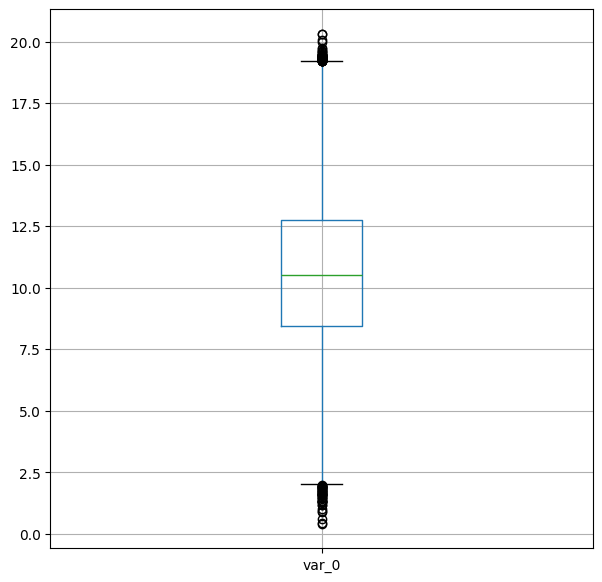

In [73]:
import matplotlib.pyplot as plt
plt.figure()
train[['var_0']].boxplot()
plt.show()

### 설마 이상치 때문인가?

In [81]:
def remove_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    return df

# 모든 변수에 대해 이상치 제거 수행

In [83]:
train_columns = train.columns[3:]

In [84]:
train_columns

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=199)

In [87]:
for var in tqdm(train_columns):
    train = remove_outliers(train, var)

100%|█████████████████████████████████████████████████████████████████████████████████| 199/199 [00:24<00:00,  8.04it/s]


# 다시 선형회귀 해보자자

In [92]:
200000- train.shape[0] #24861 개 제거

24861

### 로지스틱회귀, 결정트리, 랜덤포레스트, 그래디언트,서포트 벡터, 
### 샘플링기법 오버샘플링?
### 정확도(Accuracy) 외에도 정밀도(Precision), 재현율(Recall), F1 점수(F1-score)

### 의사결정리리

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
dt = DecisionTreeClassifier()

# 탐색할 매개변수들 설정
param_grid = {
    'max_depth': [None, 5, 10, 15,20],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10,15],  # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4,8],  # 리프 노드에 필요한 최소 샘플 수
    'max_features': [None, 'sqrt', 'log2']  # 각 분할에서 고려할 특성의 최대 수
}

# Grid Search를 사용하여 최적의 매개변수 탐색
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# 최적의 매개변수 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
# 정밀도 평가
precision = precision_score(y_test, y_pred)
print(f"Precision on test set: {precision:.4f}")
# 재현율 평가
recall = recall_score(y_test, y_pred)
print(f"Recall on test set: {recall:.4f}")

# 변수가 200개므로 pca주성분분석사용
# 하지만 첫번째가 0.07이라서 무시할수있음

In [48]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
train.head()
pca_train = train.drop(columns=["ID_code","target"],axis=1)
pca_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [50]:
pd.options.display.max_columns = None

In [51]:
pca_train.describe().shape

(8, 200)

In [52]:
import numpy
numpy.set_printoptions(suppress=True)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1004)
pca.fit_transform(pca_train)
## percentage of variance explained
print(pca.explained_variance_ratio_)

[0.07134872 0.03102161 0.0275696  0.02691158 0.02489565 0.02287989
 0.02225093 0.02105403 0.02086593 0.02017547 0.01843942 0.01743735
 0.01699429 0.0168076  0.01674814 0.01353783 0.01311899 0.01251764
 0.01231977 0.01207323 0.0117257  0.01160495 0.01146182 0.01132444
 0.01120584 0.01103471 0.01073858 0.0106792  0.01045111 0.01043076
 0.00997412 0.00989096 0.00983693 0.00967727 0.009619   0.00960881
 0.00959018 0.00947158 0.00934341 0.00918018 0.00902137 0.00899918
 0.00879427 0.00868902 0.00861316 0.00854902 0.00841111 0.00791761
 0.00702975 0.00700604 0.00603673 0.00592779 0.00588667 0.00571483
 0.00555849 0.00554133 0.00548461 0.00546027 0.00542685 0.0053707
 0.00518439 0.00506297 0.00503266 0.00497419 0.00482977 0.00471489
 0.00463665 0.00462696 0.00450185 0.00431215 0.00430234 0.00417789
 0.00415624 0.00392829 0.00387163 0.00383179 0.0038133  0.00372902
 0.00347578 0.00334783 0.00323616 0.00322687 0.0031192  0.00309264
 0.00304941 0.00295232 0.0029079  0.00287015 0.00285068 0.00277

In [54]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


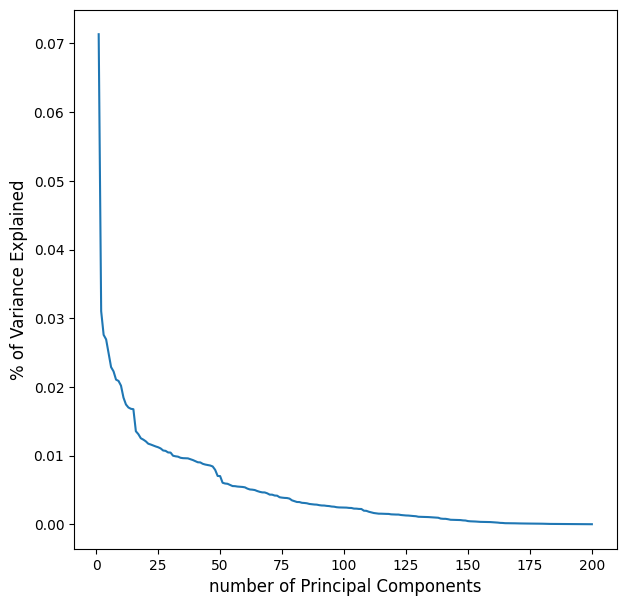

In [55]:
import matplotlib.pyplot as plt,matplotlib
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, pca_train.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()